<a href="https://colab.research.google.com/github/agmalaga2020/PolicySpace2_Spanish_data/blob/main/df_mortalidad_ccaa_sexo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INICIO

- 1º buscamos fuente a explorar
https://uoc0-my.sharepoint.com/:x:/g/personal/agmalaga_uoc_edu/EVrtEuZkGqxMsXz3ENcmP8sB8w9sxyyFWBX3pDP282BDaQ?e=hZX8jz

_______________________________________________________________

- 2º `CARGAMOS` DATAFRAME ORIGINAL del proyecto **github**
https://github.com/agmalaga2020/PolicySpace2-agmalaga/tree/master/input

_______________________________________________________________
- 3º Realizamos analisis exploratorio en google colab.
_______________________________________________________________

- 4º descargamos datos y creamos informe.
_______________________________________________________________

- 5º actualizar LINK de la columna `NOTEBOOK`
https://uoc0-my.sharepoint.com/:x:/g/personal/agmalaga_uoc_edu/EVrtEuZkGqxMsXz3ENcmP8sB8w9sxyyFWBX3pDP282BDaQ?e=hZX8jz

_______________________________________________________________

ESQUEMA DE PROCESO

https://whiteboard.office.com/me/whiteboards/p/c3BvOmh0dHBzOi8vdW9jMC1teS5zaGFyZXBvaW50LmNvbS9wZXJzb25hbC9hZ21hbGFnYV91b2NfZWR1/b!r4X97qYbxUyQGQNSpn-bfrNi376yDThFsrR2Kul1sxTx_nU34TfBSpdz-6pNWzvq/01E765GIPQJMS23ADWVBEID5XGUDPDSQNZ?source=applauncher&auth_upn=agmalaga%40uoc.edu

### tabla ejemplo mortalidad


https://raw.githubusercontent.com/BAFurtado/PolicySpace2/refs/heads/master/input/mortality/mortality_men_AC.csv

In [3]:
import requests
import pandas as pd
import io

# Update the URL to point to the raw CSV data on GitHub
url = 'https://raw.githubusercontent.com/BAFurtado/PolicySpace2/refs/heads/master/input/mortality/mortality_men_AC.csv'
s = requests.get(url).content

# Read the CSV data using ';' as the separator
df_original = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=';')

print(df_original.head())

   age      2000      2001      2002      2003      2004      2005      2006  \
0    0  0.042224  0.039859  0.037620  0.035509  0.033525  0.031667  0.029933   
1    1  0.002378  0.002185  0.001999  0.001822  0.001652  0.001490  0.001336   
2    2  0.002378  0.002185  0.001999  0.001822  0.001652  0.001490  0.001336   
3    3  0.002378  0.002185  0.001999  0.001822  0.001652  0.001490  0.001336   
4    4  0.002378  0.002185  0.001999  0.001822  0.001652  0.001490  0.001336   

      2007      2008  ...      2021      2022      2023      2024      2025  \
0  0.02832  0.026825  ...  0.015633  0.015218  0.014844  0.014506  0.014201   
1  0.00119  0.001052  ...  0.000585  0.000571  0.000558  0.000546  0.000535   
2  0.00119  0.001052  ...  0.000585  0.000571  0.000558  0.000546  0.000535   
3  0.00119  0.001052  ...  0.000585  0.000571  0.000558  0.000546  0.000535   
4  0.00119  0.001052  ...  0.000585  0.000571  0.000558  0.000546  0.000535   

       2026      2027      2028      2029   

# ESPAÑA



---

### 📊 Datos de mortalidad en PolicySpace2

En el proyecto **PolicySpace2**, los datos de mortalidad se organizan y utilizan como parte fundamental del modelo demográfico. Estos datos permiten simular cómo cambian las poblaciones a lo largo del tiempo, lo cual es clave para evaluar políticas públicas de vivienda y bienestar.

---

### 🧩 ¿Qué datos de mortalidad se usan?

Para cada individuo del modelo, se considera:

- **Edad** (de 0 a 110 años)  
- **Sexo** (hombre o mujer)  
- **Año** (de 2010 a 2020)  
- **Estado** (en el caso de Brasil, a nivel estadual)

Cada mes, el modelo revisa si una persona cumple años. Si es así, aplica las probabilidades correspondientes de:

- **Muerte** (según su edad, sexo y año)
- **Nacimiento** (para mujeres entre 15 y 49 años)

Estos datos provienen del **IBGE (Instituto Brasileño de Geografía y Estadística)** y se usan para modelar con precisión los cambios en la estructura de los hogares.

---

### 🇪🇸 Para adaptar el modelo a España, necesitamos:

1. **Tasas de mortalidad anuales** por edad y sexo.
2. **Cobertura territorial** idealmente por comunidad autónoma.
3. Un periodo temporal suficientemente amplio (por ejemplo, 2010–2020).
4. Una estructura de datos que permita aplicar esas tasas mensualmente.

Una buena fuente sería el **Instituto Nacional de Estadística (INE)**, que publica tablas de mortalidad detalladas.

---

### 🧠 ¿Por qué son importantes estos datos?

- Definen la evolución de la población dentro del modelo.
- Afectan la creación y disolución de hogares.
- Impactan en la demanda de vivienda, empleo y consumo.


### Resultados nacionales, por comunidades autónomas y provincias

- Series desde 1991
- Tablas de mortalidad por año, comunidades y ciudades autónomas, sexo, edad y funciones.


https://www.ine.es/jaxiT3/Tabla.htm?t=27154


### extraemos las tablas

In [6]:
import requests
import pandas as pd

# Código de la tabla
table_code = "27154"
url_csv = f"https://servicios.ine.es/wstempus/csv/ES/DATOS_TABLA/{table_code}?nult=999"

response = requests.get(url_csv)

if response.status_code == 200:
    csv_data = response.content.decode('utf-8')

    # Guardar el archivo CSV con un nombre adecuado usando el código de la tabla
    file_name = f"tabla_{table_code}.csv"
    with open(file_name, "w", encoding="utf-8") as f:
        f.write(csv_data)
    print(f"Archivo CSV guardado como '{file_name}'")
else:
    print("Error en la petición: ❌", response.status_code)

# Leer el CSV
df = pd.read_csv(file_name, sep='\t', encoding='utf-8')

# Mostrar las primeras filas
print(df.head())
print("Tabla actualizada conseguida ✅")

try:
    df.to_csv(f'/content/{table_code}.csv', index=False)
    print(f"✅ Copia de df guardada en '/content/{table_code}.csv'")
    print("Se ha guardado una copia del DataFrame df.")
except NameError:
    print("⚠️ df o table_code no están definidos. No se puede guardar la copia.")

Archivo CSV guardado como 'tabla_27154.csv'
  Comunidades y Ciudades Autónomas         Sexo    Edad           Funciones  \
0                     01 Andalucía  Ambos sexos  0 años  Tasa de mortalidad   
1                     01 Andalucía  Ambos sexos  0 años  Tasa de mortalidad   
2                     01 Andalucía  Ambos sexos  0 años  Tasa de mortalidad   
3                     01 Andalucía  Ambos sexos  0 años  Tasa de mortalidad   
4                     01 Andalucía  Ambos sexos  0 años  Tasa de mortalidad   

   Periodo     Total  
0     2023  2,704019  
1     2022  2,593818  
2     2021  3,003972  
3     2020  2,879109  
4     2019  3,026195  
Tabla actualizada conseguida ✅
✅ Copia de df guardada en '/content/27154.csv'
Se ha guardado una copia del DataFrame df.


In [7]:
# Paso 1: Filtrar solo las tasas de mortalidad
df_mortalidad = df[df['Funciones'] == 'Tasa de mortalidad'].copy()

# Paso 2: Convertir columna 'Total' de texto a número (coma por punto)
df_mortalidad['Total'] = df_mortalidad['Total'].str.replace(',', '.', regex=False).astype(float)

# Paso 3: Limpiar columna 'Edad'
df_mortalidad['Edad'] = df_mortalidad['Edad'].str.extract(r'(\d+)').astype(int)

# Mostrar un ejemplo de cómo ha quedado
df_mortalidad.sample(5)


,Comunidades y Ciudades Autónomas,Sexo,Edad,Funciones,Periodo,Total
113547,07 Castilla y León,Hombres,55,Tasa de mortalidad,1996,8.425773
37508,"03 Asturias, Principado de",Ambos sexos,45,Tasa de mortalidad,2003,3.208195
5298,01 Andalucía,Ambos sexos,90,Tasa de mortalidad,2005,244.103565
253969,"15 Navarra, Comunidad Foral de",Hombres,75,Tasa de mortalidad,2022,33.964490
46746,"03 Asturias, Principado de",Mujeres,1,Tasa de mortalidad,2005,0.216409


In [ ]:
# Eliminar filas donde el sexo sea "Ambos sexos"
df_mortalidad = df_mortalidad[df_mortalidad['Sexo'] != 'Ambos sexos'].copy()

# Separar código y nombre de la comunidad autónoma
df_mortalidad[['ccaa_code', 'ccaa_name']] = df_mortalidad['Comunidades y Ciudades Autónomas'].str.extract(r'^(\d+)\s+(.*)')



In [10]:
df_mortalidad.head()

,Comunidades y Ciudades Autónomas,Sexo,Edad,Funciones,Periodo,Total,ccaa_code,ccaa_name
5808,01 Andalucía,Hombres,0,Tasa de mortalidad,2023,2.944904,01,Andalucía
5809,01 Andalucía,Hombres,0,Tasa de mortalidad,2022,3.022893,01,Andalucía
5810,01 Andalucía,Hombres,0,Tasa de mortalidad,2021,3.231433,01,Andalucía
5811,01 Andalucía,Hombres,0,Tasa de mortalidad,2020,3.287182,01,Andalucía
5812,01 Andalucía,Hombres,0,Tasa de mortalidad,2019,3.357875,01,Andalucía


In [11]:
# Función para explorar valores únicos por columna
def print_unique_values_and_len(df):
    for column in df.columns:
        unique_values = df[column].unique()
        nan_count = df[column].isnull().sum()
        dtype = df[column].dtype
        print(f"🧩 Columna: {column}")
        print(f"- Valores únicos: {unique_values[:10]}{'...' if len(unique_values) > 10 else ''}")
        print(f"- Total únicos: {len(unique_values)}")
        print(f"- NaNs: {nan_count}")
        print(f"- Tipo: {dtype}\n")

# Ejecutar la función sobre el dataframe limpio
print_unique_values_and_len(df_mortalidad)


🧩 Columna: Comunidades y Ciudades Autónomas
- Valores únicos: ['01 Andalucía' '02 Aragón' '03 Asturias, Principado de'
 '04 Balears, Illes' '05 Canarias' '06 Cantabria' '07 Castilla y León'
 '08 Castilla - La Mancha' '09 Cataluña' '10 Comunitat Valenciana']...
- Total únicos: 19
- NaNs: 0
- Tipo: object

🧩 Columna: Sexo
- Valores únicos: ['Hombres' 'Mujeres']
- Total únicos: 2
- NaNs: 0
- Tipo: object

🧩 Columna: Edad
- Valores únicos: [ 0  1  5 10 15 20 25 30 35 40]...
- Total únicos: 21
- NaNs: 0
- Tipo: int64

🧩 Columna: Funciones
- Valores únicos: ['Tasa de mortalidad']
- Total únicos: 1
- NaNs: 0
- Tipo: object

🧩 Columna: Periodo
- Valores únicos: [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]...
- Total únicos: 33
- NaNs: 0
- Tipo: int64

🧩 Columna: Total
- Valores únicos: [2.944904 3.022893 3.231433 3.287182 3.357875 3.104112 3.388174 3.135458
 2.847855 3.622439]...
- Total únicos: 25431
- NaNs: 1386
- Tipo: float64

🧩 Columna: ccaa_code
- Valores únicos: ['01' '02' '03' '


---

### 🔍 Posibles causas de los NaNs

Ya que el resto de las columnas no tienen valores nulos, es muy probable que los `NaN` de `Total` correspondan a combinaciones específicas de:

- Comunidad Autónoma
- Sexo
- Edad
- Año (Periodo)

---

### ✅ Siguiente paso propuesto

Ver en qué casos exactamente hay `NaN` en `Total`, por ejemplo:

- ¿Faltan todos los años para cierta edad?
- ¿O solo falta un año puntual que podríamos interpolar?

Voy a agrupar y mostrar ejemplos de dónde se concentran esos `NaN`, para decidir cómo imputarlos o descartarlos.

Aquí tienes el resultado del análisis de los `NaN` en la tasa de mortalidad:

---

### 🔍 Casos más graves (todos los años faltan)

Estas combinaciones **no tienen ningún dato disponible (33 años con NaN)**:

| Comunidad               | Sexo     | Edad |
|-------------------------|----------|------|
| Andalucía              | Hombres  | 90   |
| Melilla                | Hombres  | 90–95|
| Comunitat Valenciana   | Mujeres  | 90   |
| Extremadura            | Ambos    | 90   |
| Galicia                | Ambos    | 90   |
| Madrid, Comunidad de   | Ambos    | 90   |

Y probablemente más en edades altas.

---

### 🧠 ¿Qué significa esto?

- No hay datos de mortalidad para edades muy avanzadas (por ejemplo, 90 años) en algunas CCAA.
- Esto es un **problema estructural**, no un simple error de un año.

---



In [12]:
# Filtrar solo los registros con NaN en 'Total'
nulos = df_mortalidad[df_mortalidad['Total'].isna()]

# Ver cuántos NaN hay por combinación de comunidad, sexo y edad
nulos_grouped = nulos.groupby(['ccaa_name', 'Sexo', 'Edad'])['Periodo'].count().reset_index(name='años_con_nan')

# Mostrar los casos con más años perdidos
nulos_grouped.sort_values(by='años_con_nan', ascending=False).head(10)


,ccaa_name,Sexo,Edad,años_con_nan
0,Andalucía,Hombres,90,33
1,Andalucía,Mujeres,90,33
2,Aragón,Hombres,90,33
3,Aragón,Mujeres,90,33
4,"Asturias, Principado de",Hombres,90,33
5,"Asturias, Principado de",Mujeres,90,33
6,"Balears, Illes",Hombres,90,33
7,"Balears, Illes",Mujeres,90,33
8,Canarias,Hombres,90,33
9,Canarias,Mujeres,90,33


In [14]:
# Total de registros esperados por combinación de ccaa_name, Sexo y Edad
total_por_grupo = df_mortalidad.groupby(['ccaa_name', 'Sexo', 'Edad'])['Periodo'].count().reset_index(name='total_años')

# Unir con el conteo de años con NaN
tabla_con_nan = pd.merge(total_por_grupo, nulos_grouped, on=['ccaa_name', 'Sexo', 'Edad'], how='left')

# Rellenar los NaN con 0 (donde no había valores nulos)
tabla_con_nan['años_con_nan'] = tabla_con_nan['años_con_nan'].fillna(0).astype(int)

# Mostrar los resultados solo para Edad == 90
tabla_con_nan_edad_90 = tabla_con_nan[tabla_con_nan['Edad'] == 90].sort_values(['ccaa_name', 'Sexo'])
tabla_con_nan_edad_90.head()

,ccaa_name,Sexo,Edad,total_años,años_con_nan
19,Andalucía,Hombres,90,66,33
40,Andalucía,Mujeres,90,66,33
61,Aragón,Hombres,90,66,33
82,Aragón,Mujeres,90,66,33
103,"Asturias, Principado de",Hombres,90,66,33


In [15]:
# Contar la cantidad de NaNs por año (Periodo)
nulos_por_anyo = df_mortalidad[df_mortalidad['Total'].isna()].groupby('Periodo').size().reset_index(name='num_nans')

# Ordenar de mayor a menor para ver los peores años
nulos_por_anyo = nulos_por_anyo.sort_values(by='num_nans', ascending=False)

nulos_por_anyo.head(10)


,Periodo,num_nans
0,1991,42
1,1992,42
2,1993,42
3,1994,42
4,1995,42
5,1996,42
6,1997,42
7,1998,42
8,1999,42
9,2000,42


In [17]:
# Extraer algunas filas completas con NaN para analizarlas manualmente
muestras_nan = df_mortalidad[df_mortalidad['Total'].isna()].sort_values(['ccaa_name', 'Sexo', 'Edad', 'Periodo'])

# Mostrar 15 ejemplos variados
muestras_nan.head(15)

,Comunidades y Ciudades Autónomas,Sexo,Edad,Funciones,Periodo,Total,ccaa_code,ccaa_name
10856,01 Andalucía,Hombres,90,Tasa de mortalidad,1991,NaN,01,Andalucía
10855,01 Andalucía,Hombres,90,Tasa de mortalidad,1992,NaN,01,Andalucía
10854,01 Andalucía,Hombres,90,Tasa de mortalidad,1993,NaN,01,Andalucía
10853,01 Andalucía,Hombres,90,Tasa de mortalidad,1994,NaN,01,Andalucía
10852,01 Andalucía,Hombres,90,Tasa de mortalidad,1995,NaN,01,Andalucía
10851,01 Andalucía,Hombres,90,Tasa de mortalidad,1996,NaN,01,Andalucía
10850,01 Andalucía,Hombres,90,Tasa de mortalidad,1997,NaN,01,Andalucía
10849,01 Andalucía,Hombres,90,Tasa de mortalidad,1998,NaN,01,Andalucía
10848,01 Andalucía,Hombres,90,Tasa de mortalidad,1999,NaN,01,Andalucía
10847,01 Andalucía,Hombres,90,Tasa de mortalidad,2000,NaN,01,Andalucía


In [18]:
# Filtrar por comunidad "01" (Andalucía) y año 1992
filtro_andalucia_1992 = df_mortalidad[(df_mortalidad['ccaa_code'] == '01') & (df_mortalidad['Periodo'] == 1992)]

filtro_andalucia_1992.sort_values(by=['Edad', 'Sexo'])


,Comunidades y Ciudades Autónomas,Sexo,Edad,Funciones,Periodo,Total,ccaa_code,ccaa_name
5839,01 Andalucía,Hombres,0,Tasa de mortalidad,1992,8.507553,01,Andalucía
11647,01 Andalucía,Mujeres,0,Tasa de mortalidad,1992,6.909590,01,Andalucía
6103,01 Andalucía,Hombres,1,Tasa de mortalidad,1992,0.441065,01,Andalucía
11911,01 Andalucía,Mujeres,1,Tasa de mortalidad,1992,0.337036,01,Andalucía
6367,01 Andalucía,Hombres,5,Tasa de mortalidad,1992,0.162155,01,Andalucía
12175,01 Andalucía,Mujeres,5,Tasa de mortalidad,1992,0.186702,01,Andalucía
6631,01 Andalucía,Hombres,10,Tasa de mortalidad,1992,0.216599,01,Andalucía
12439,01 Andalucía,Mujeres,10,Tasa de mortalidad,1992,0.155572,01,Andalucía
6895,01 Andalucía,Hombres,15,Tasa de mortalidad,1992,0.659251,01,Andalucía
12703,01 Andalucía,Mujeres,15,Tasa de mortalidad,1992,0.264667,01,Andalucía


In [19]:
# Buscar duplicados reales por ccaa, sexo, edad y periodo
duplicados = df_mortalidad.groupby(['ccaa_code', 'Sexo', 'Edad', 'Periodo']).size().reset_index(name='conteo')
duplicados_multiples = duplicados[duplicados['conteo'] > 1]

# Mostrar cuántos casos hay y ejemplos
num_duplicados = len(duplicados_multiples)
ejemplos_duplicados = duplicados_multiples.head(10)

num_duplicados, ejemplos_duplicados


(1254,
     ccaa_code     Sexo  Edad  Periodo  conteo
 627        01  Hombres    90     1991       2
 628        01  Hombres    90     1992       2
 629        01  Hombres    90     1993       2
 630        01  Hombres    90     1994       2
 631        01  Hombres    90     1995       2
 632        01  Hombres    90     1996       2
 633        01  Hombres    90     1997       2
 634        01  Hombres    90     1998       2
 635        01  Hombres    90     1999       2
 636        01  Hombres    90     2000       2)

⚠️ Hay 1254 combinaciones duplicadas en total


In [20]:
# Filtrar duplicados donde uno tenga NaN y otro no
duplicados_indices = df_mortalidad.duplicated(subset=['ccaa_code', 'Sexo', 'Edad', 'Periodo'], keep=False)
duplicados_df = df_mortalidad[duplicados_indices].copy()

# Eliminar las filas con NaN entre los duplicados
sin_nan_entre_duplicados = duplicados_df.dropna(subset=['Total'])

# Eliminar completamente los duplicados originales y reemplazar por los sin NaN
df_mortalidad_limpio = df_mortalidad[~duplicados_indices].copy()
df_mortalidad_limpio = pd.concat([df_mortalidad_limpio, sin_nan_entre_duplicados], ignore_index=True)

# Verificar que ya no haya duplicados
verificacion = df_mortalidad_limpio.duplicated(subset=['ccaa_code', 'Sexo', 'Edad', 'Periodo']).sum()

verificacion


np.int64(0)

In [22]:
# prompt: df_mortalidad_limpio nan por columnas

# Función para explorar valores únicos por columna y contar NaNs
def print_unique_values_and_nan_counts(df):
    for column in df.columns:
        unique_values = df[column].unique()
        nan_count = df[column].isnull().sum()
        print(f"Columna: {column}")
        print(f"- Valores únicos: {unique_values[:10]}{'...' if len(unique_values) > 10 else ''}")  # Mostrar los primeros 10 valores únicos
        print(f"- Total únicos: {len(unique_values)}")
        print(f"- NaNs: {nan_count}\n")

# Aplicar la función al DataFrame df_mortalidad_limpio
print_unique_values_and_nan_counts(df_mortalidad_limpio)


Columna: Comunidades y Ciudades Autónomas
- Valores únicos: ['01 Andalucía' '02 Aragón' '03 Asturias, Principado de'
 '04 Balears, Illes' '05 Canarias' '06 Cantabria' '07 Castilla y León'
 '08 Castilla - La Mancha' '09 Cataluña' '10 Comunitat Valenciana']...
- Total únicos: 19
- NaNs: 0

Columna: Sexo
- Valores únicos: ['Hombres' 'Mujeres']
- Total únicos: 2
- NaNs: 0

Columna: Edad
- Valores únicos: [ 0  1  5 10 15 20 25 30 35 40]...
- Total únicos: 21
- NaNs: 0

Columna: Funciones
- Valores únicos: ['Tasa de mortalidad']
- Total únicos: 1
- NaNs: 0

Columna: Periodo
- Valores únicos: [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]...
- Total únicos: 33
- NaNs: 0

Columna: Total
- Valores únicos: [2.944904 3.022893 3.231433 3.287182 3.357875 3.104112 3.388174 3.135458
 2.847855 3.622439]...
- Total únicos: 25431
- NaNs: 132

Columna: ccaa_code
- Valores únicos: ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10']...
- Total únicos: 19
- NaNs: 0

Columna: ccaa_name
- Valores únicos:

In [25]:
# Filtrar por ccaa_code 18 (Ceuta) y edad 95
ceuta_edad_95 = df_mortalidad_limpio[(df_mortalidad_limpio['ccaa_code'] == '18') & (df_mortalidad_limpio['Edad'] == 95)]

ceuta_edad_95.sort_values(by=['Sexo', 'Periodo'])


,Comunidades y Ciudades Autónomas,Sexo,Edad,Funciones,Periodo,Total,ccaa_code,ccaa_name
23099,18 Ceuta,Hombres,95,Tasa de mortalidad,1991,NaN,18,Ceuta
23098,18 Ceuta,Hombres,95,Tasa de mortalidad,1992,NaN,18,Ceuta
23097,18 Ceuta,Hombres,95,Tasa de mortalidad,1993,NaN,18,Ceuta
23096,18 Ceuta,Hombres,95,Tasa de mortalidad,1994,NaN,18,Ceuta
23095,18 Ceuta,Hombres,95,Tasa de mortalidad,1995,NaN,18,Ceuta
...,...,...,...,...,...,...,...,...
23731,18 Ceuta,Mujeres,95,Tasa de mortalidad,2019,NaN,18,Ceuta
23730,18 Ceuta,Mujeres,95,Tasa de mortalidad,2020,NaN,18,Ceuta
23729,18 Ceuta,Mujeres,95,Tasa de mortalidad,2021,NaN,18,Ceuta
23728,18 Ceuta,Mujeres,95,Tasa de mortalidad,2022,NaN,18,Ceuta


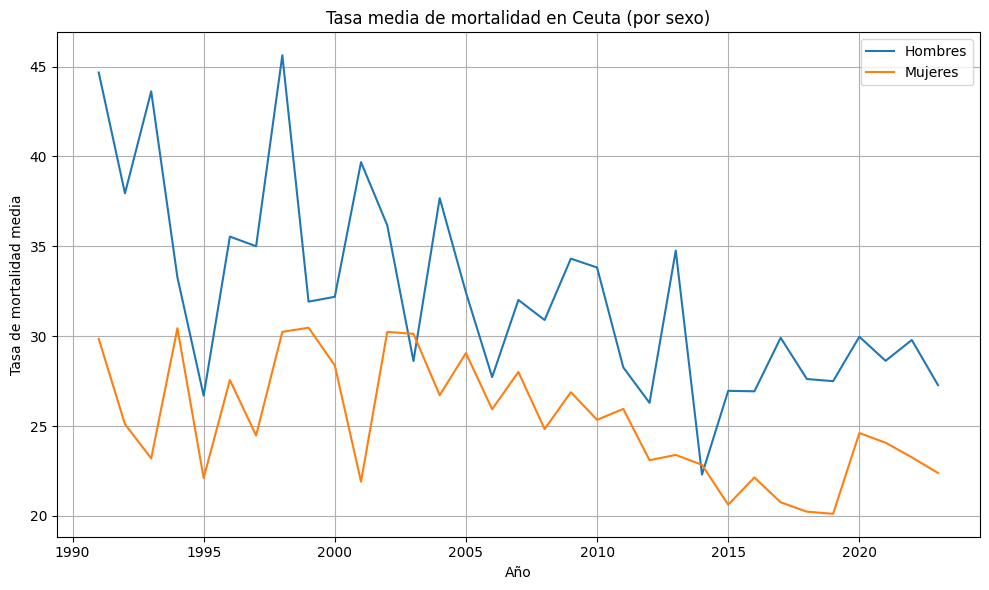

In [24]:
import matplotlib.pyplot as plt

# Filtrar todos los datos de Ceuta
ceuta = df_mortalidad_limpio[df_mortalidad_limpio['ccaa_code'] == '18']

# Agrupar por año y sexo y calcular la media de tasas de mortalidad (ignorando NaN)
ceuta_agg = ceuta.groupby(['Periodo', 'Sexo'])['Total'].mean().reset_index()

# Crear la gráfica
plt.figure(figsize=(10, 6))
for sexo in ceuta_agg['Sexo'].unique():
    subset = ceuta_agg[ceuta_agg['Sexo'] == sexo]
    plt.plot(subset['Periodo'], subset['Total'], label=sexo)

plt.title("Tasa media de mortalidad en Ceuta (por sexo)")
plt.xlabel("Año")
plt.ylabel("Tasa de mortalidad media")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


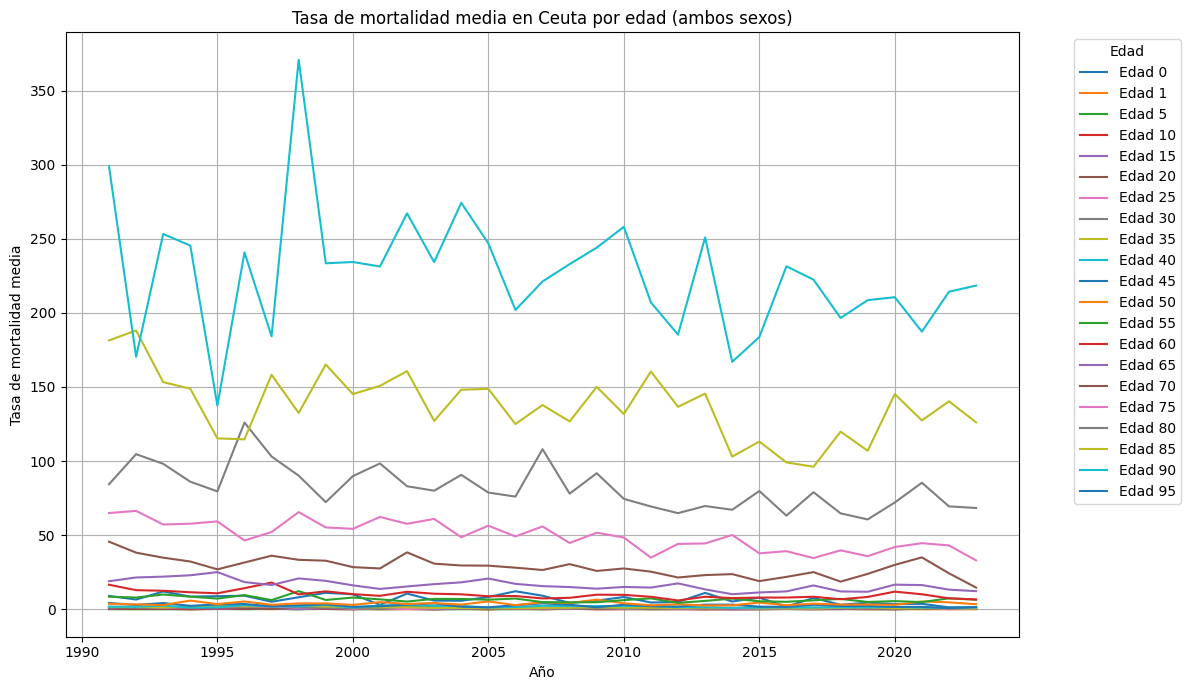

In [26]:
# Agrupar por año y edad, promediando ambos sexos
ceuta_edades = ceuta.groupby(['Periodo', 'Edad'])['Total'].mean().reset_index()

# Crear gráfico de líneas para cada grupo de edad
plt.figure(figsize=(12, 7))
for edad in sorted(ceuta_edades['Edad'].unique()):
    subset = ceuta_edades[ceuta_edades['Edad'] == edad]
    plt.plot(subset['Periodo'], subset['Total'], label=f'Edad {edad}')

plt.title("Tasa de mortalidad media en Ceuta por edad (ambos sexos)")
plt.xlabel("Año")
plt.ylabel("Tasa de mortalidad media")
plt.legend(title="Edad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Agrupar por año y edad, promediando ambos sexos
ceuta_edades = ceuta.groupby(['Periodo', 'Edad'])['Total'].mean().reset_index()

# Crear gráfico de líneas para cada grupo de edad
plt.figure(figsize=(12, 7))
for edad in sorted(ceuta_edades['Edad'].unique()):
    subset = ceuta_edades[ceuta_edades['Edad'] == edad]
    plt.plot(subset['Periodo'], subset['Total'], label=f'Edad {edad}')

plt.title("Tasa de mortalidad media en Ceuta por edad (ambos sexos)")
plt.xlabel("Año")
plt.ylabel("Tasa de mortalidad media")
plt.legend(title="Edad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


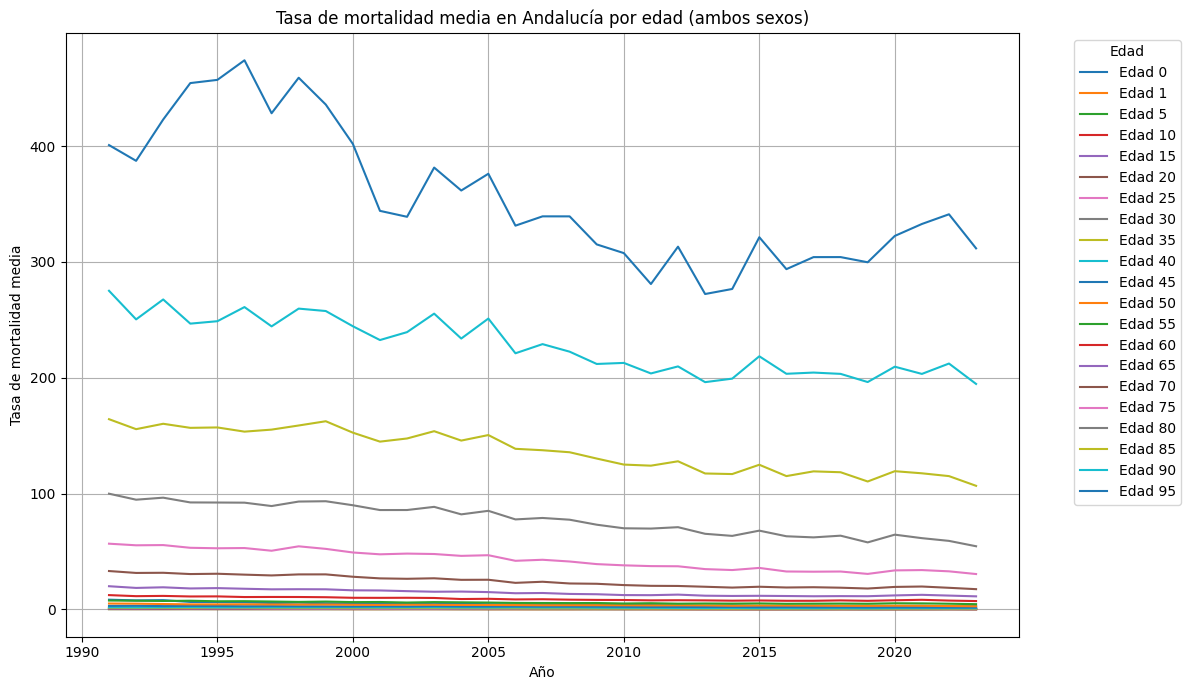

In [27]:
# Filtrar todos los datos de Andalucía
andalucia = df_mortalidad_limpio[df_mortalidad_limpio['ccaa_code'] == '01']

# Agrupar por año y edad, promediando ambos sexos
andalucia_edades = andalucia.groupby(['Periodo', 'Edad'])['Total'].mean().reset_index()

# Crear gráfico de líneas para cada grupo de edad
plt.figure(figsize=(12, 7))
for edad in sorted(andalucia_edades['Edad'].unique()):
    subset = andalucia_edades[andalucia_edades['Edad'] == edad]
    plt.plot(subset['Periodo'], subset['Total'], label=f'Edad {edad}')

plt.title("Tasa de mortalidad media en Andalucía por edad (ambos sexos)")
plt.xlabel("Año")
plt.ylabel("Tasa de mortalidad media")
plt.legend(title="Edad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
# Agrupar los NaNs restantes por comunidad, edad y sexo
nulos_por_ccaa_edad_sexo = nulos_finales.groupby(['ccaa_name', 'Edad', 'Sexo']).size().reset_index(name='cuenta_nans')
nulos_por_ccaa_edad_sexo = nulos_por_ccaa_edad_sexo.sort_values(by='cuenta_nans', ascending=False)

nulos_por_ccaa_edad_sexo


,ccaa_name,Edad,Sexo,cuenta_nans
0,Ceuta,95,Hombres,33
1,Ceuta,95,Mujeres,33
2,Melilla,95,Hombres,33
3,Melilla,95,Mujeres,33


In [31]:
print(df_mortalidad.shape) # filas y columnas

(27588, 8)


In [33]:
# Calcular la media nacional por año, edad 95, separado por sexo, excluyendo Ceuta y Melilla
media_nacional_edad_95 = (
    df_mortalidad_limpio[
        (df_mortalidad_limpio['Edad'] == 95) &
        (~df_mortalidad_limpio['ccaa_name'].isin(['Ceuta', 'Melilla'])) &
        (df_mortalidad_limpio['Total'].notna())
    ]
    .groupby(['Periodo', 'Sexo'])['Total']
    .mean()
    .reset_index(name='media_nacional_edad_95')
)

# Ver los primeros resultados
media_nacional_edad_95.head()


,Periodo,Sexo,media_nacional_edad_95
0,1991,Hombres,402.644796
1,1991,Mujeres,365.217207
2,1992,Hombres,388.793206
3,1992,Mujeres,380.473906
4,1993,Hombres,418.087660


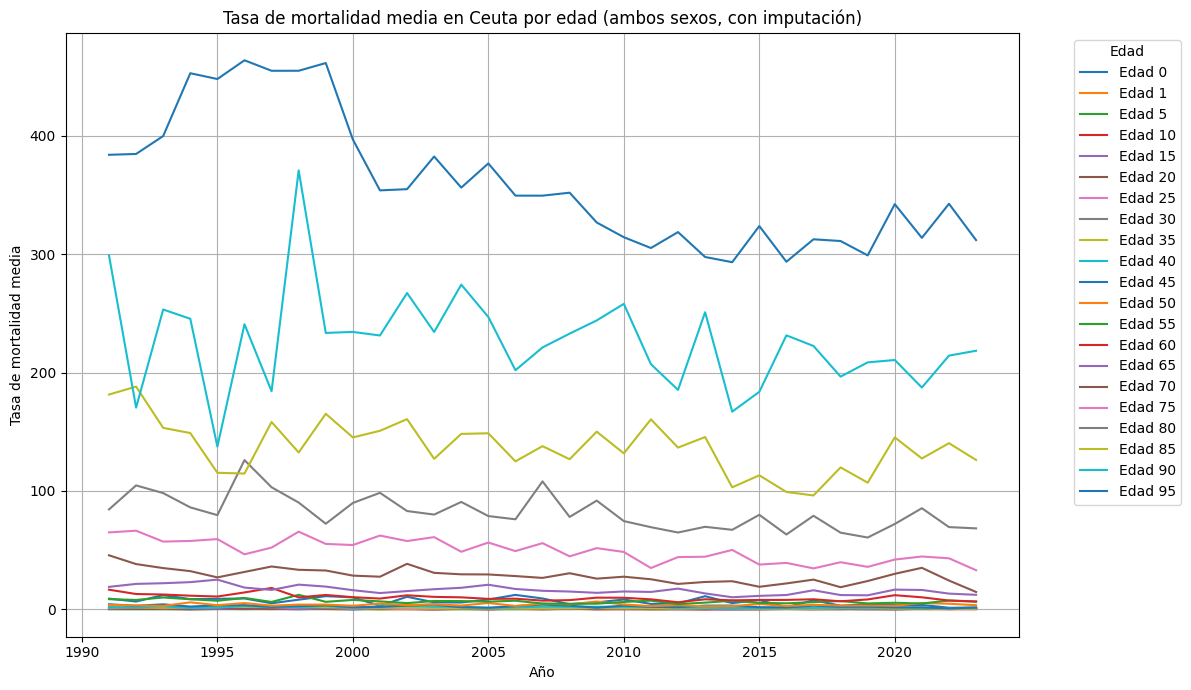

In [34]:
# Crear copia del DataFrame limpio para trabajar sobre ella
df_mortalidad_imputado = df_mortalidad_limpio.copy()

# Localizar los NaN que vamos a imputar (Ceuta y Melilla, edad 95)
mascaras_nan = (
    df_mortalidad_imputado['Edad'] == 95) & \
    (df_mortalidad_imputado['ccaa_name'].isin(['Ceuta', 'Melilla'])) & \
    (df_mortalidad_imputado['Total'].isna()
)

# Unir con las medias nacionales por año y sexo
df_mortalidad_imputado = df_mortalidad_imputado.merge(
    media_nacional_edad_95,
    on=['Periodo', 'Sexo'],
    how='left'
)

# Rellenar solo donde hay NaN en 'Total' y coincide con la máscara
df_mortalidad_imputado.loc[mascaras_nan, 'Total'] = df_mortalidad_imputado.loc[mascaras_nan, 'media_nacional_edad_95']

# Eliminar columna auxiliar
df_mortalidad_imputado.drop(columns='media_nacional_edad_95', inplace=True)

# Verificar que ya no hay NaNs
nuevos_nulos_finales = df_mortalidad_imputado[df_mortalidad_imputado['Total'].isna()].shape[0]

# Volver a graficar Ceuta por edad
import matplotlib.pyplot as plt

ceuta_final = df_mortalidad_imputado[df_mortalidad_imputado['ccaa_code'] == '18']
ceuta_edades_final = ceuta_final.groupby(['Periodo', 'Edad'])['Total'].mean().reset_index()

plt.figure(figsize=(12, 7))
for edad in sorted(ceuta_edades_final['Edad'].unique()):
    subset = ceuta_edades_final[ceuta_edades_final['Edad'] == edad]
    plt.plot(subset['Periodo'], subset['Total'], label=f'Edad {edad}')

plt.title("Tasa de mortalidad media en Ceuta por edad (ambos sexos, con imputación)")
plt.xlabel("Año")
plt.ylabel("Tasa de mortalidad media")
plt.legend(title="Edad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
# Calcular porcentaje de NaNs en la columna 'Total' del DataFrame imputado
porcentaje_nan = df_mortalidad_imputado['Total'].isna().mean() * 100
porcentaje_nan


np.float64(0.0)

In [36]:
df_mortalidad_imputado

,Comunidades y Ciudades Autónomas,Sexo,Edad,Funciones,Periodo,Total,ccaa_code,ccaa_name
0,01 Andalucía,Hombres,0,Tasa de mortalidad,2023,2.944904,01,Andalucía
1,01 Andalucía,Hombres,0,Tasa de mortalidad,2022,3.022893,01,Andalucía
2,01 Andalucía,Hombres,0,Tasa de mortalidad,2021,3.231433,01,Andalucía
3,01 Andalucía,Hombres,0,Tasa de mortalidad,2020,3.287182,01,Andalucía
4,01 Andalucía,Hombres,0,Tasa de mortalidad,2019,3.357875,01,Andalucía
...,...,...,...,...,...,...,...,...
26329,19 Melilla,Mujeres,90,Tasa de mortalidad,1995,238.276682,19,Melilla
26330,19 Melilla,Mujeres,90,Tasa de mortalidad,1994,242.092387,19,Melilla
26331,19 Melilla,Mujeres,90,Tasa de mortalidad,1993,237.199244,19,Melilla
26332,19 Melilla,Mujeres,90,Tasa de mortalidad,1992,466.195641,19,Melilla


In [37]:
# Seleccionar solo las columnas necesarias
df_mortalidad_final = df_mortalidad_imputado[['ccaa_code', 'Edad', 'Periodo', 'Total', 'Sexo']].copy()

# Mostrar una vista previa
df_mortalidad_final.head()


,ccaa_code,Edad,Periodo,Total,Sexo
0,01,0,2023,2.944904,Hombres
1,01,0,2022,3.022893,Hombres
2,01,0,2021,3.231433,Hombres
3,01,0,2020,3.287182,Hombres
4,01,0,2019,3.357875,Hombres


In [38]:
tabla_codigos_ccaa = df_mortalidad_imputado[['ccaa_code', 'ccaa_name']].drop_duplicates().sort_values('ccaa_code').reset_index(drop=True)
tabla_codigos_ccaa

,ccaa_code,ccaa_name
0,01,Andalucía
1,02,Aragón
2,03,"Asturias, Principado de"
3,04,"Balears, Illes"
4,05,Canarias
5,06,Cantabria
6,07,Castilla y León
7,08,Castilla - La Mancha
8,09,Cataluña
9,10,Comunitat Valenciana


In [39]:
# Convertir las tasas de mortalidad a probabilidades (de 0 a 1)
df_mortalidad_final['Total'] = df_mortalidad_final['Total'] / 1000

# Mostrar una muestra para verificar
df_mortalidad_final.sample(5)


,ccaa_code,Edad,Periodo,Total,Sexo
16523,13,0,2000,0.004181,Mujeres
24295,19,75,2016,0.052412,Hombres
2861,03,25,2000,0.001016,Hombres
16181,13,45,2012,0.002320,Hombres
9704,08,65,2021,0.015576,Hombres


In [41]:
# prompt: guardamos df_mortalidad_final como csv

# Assuming df_mortalidad_final is already defined as in the provided code.

try:
    df_mortalidad_final.to_csv('df_mortalidad_final.csv', index=False)
    print("✅ df_mortalidad_final saved to df_mortalidad_final.csv")
except NameError:
    print("⚠️ df_mortalidad_final not defined. Cannot save.")


✅ df_mortalidad_final saved to df_mortalidad_final.csv


## creamos dataset finales

In [40]:
import os

# Crear carpeta de salida
output_dir = "/content/datos finales/mortalidad_policyspace_es"
os.makedirs(output_dir, exist_ok=True)

# Filtrar solo años 2010–2020
df_filtrado = df_mortalidad_final[df_mortalidad_final['Periodo'].between(2010, 2020)].copy()

# Crear archivos por comunidad y sexo
for ccaa in df_filtrado['ccaa_code'].unique():
    for sexo in ['Hombres', 'Mujeres']:
        df_temp = df_filtrado[(df_filtrado['ccaa_code'] == ccaa) & (df_filtrado['Sexo'] == sexo)]
        if df_temp.empty:
            continue

        # Pivotar para obtener la estructura deseada
        df_pivot = df_temp.pivot(index='Edad', columns='Periodo', values='Total').sort_index()
        df_pivot.reset_index(inplace=True)
        df_pivot.columns.name = None  # eliminar nombre del eje columnas

        # Guardar archivo
        nombre_archivo = f"mortality_{'men' if sexo == 'Hombres' else 'women'}_{ccaa}.csv"
        ruta_archivo = os.path.join(output_dir, nombre_archivo)
        df_pivot.to_csv(ruta_archivo, sep=';', index=False)

# Listar los archivos creados
sorted(os.listdir(output_dir))


['mortality_men_01.csv',
 'mortality_men_02.csv',
 'mortality_men_03.csv',
 'mortality_men_04.csv',
 'mortality_men_05.csv',
 'mortality_men_06.csv',
 'mortality_men_07.csv',
 'mortality_men_08.csv',
 'mortality_men_09.csv',
 'mortality_men_10.csv',
 'mortality_men_11.csv',
 'mortality_men_12.csv',
 'mortality_men_13.csv',
 'mortality_men_14.csv',
 'mortality_men_15.csv',
 'mortality_men_16.csv',
 'mortality_men_17.csv',
 'mortality_men_18.csv',
 'mortality_men_19.csv',
 'mortality_women_01.csv',
 'mortality_women_02.csv',
 'mortality_women_03.csv',
 'mortality_women_04.csv',
 'mortality_women_05.csv',
 'mortality_women_06.csv',
 'mortality_women_07.csv',
 'mortality_women_08.csv',
 'mortality_women_09.csv',
 'mortality_women_10.csv',
 'mortality_women_11.csv',
 'mortality_women_12.csv',
 'mortality_women_13.csv',
 'mortality_women_14.csv',
 'mortality_women_15.csv',
 'mortality_women_16.csv',
 'mortality_women_17.csv',
 'mortality_women_18.csv',
 'mortality_women_19.csv']


# 📊 Informe de Procesamiento y Transformación de Datos de Mortalidad

## 🧭 Introducción

Este informe documenta el proceso de limpieza, transformación e imputación de los datos de **tasa de mortalidad por edad, sexo y comunidad autónoma** en España.  
El objetivo es adaptar estos datos al formato requerido por el modelo **PolicySpace2**, con estructura mensual y probabilidades en formato decimal entre 0 y 1.  
Los datos provienen del **Instituto Nacional de Estadística (INE)** y fueron procesados para cubrir el periodo **2010–2020**, con estructura similar al modelo original basado en Brasil.

---

## 🧼 Proceso de Limpieza

| Paso                     | Descripción                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| Carga inicial            | Archivo `tabla_27154.csv` con tasas de mortalidad por CCAA, sexo, edad y año |
| Eliminación de duplicados| Se eliminaron combinaciones duplicadas con valores `NaN`                    |
| Filtrado de columnas     | Nos quedamos con: `ccaa_code`, `Edad`, `Periodo`, `Total`, `Sexo`           |
| Conversión               | Se transformaron tasas a probabilidades dividiendo por 1000                 |
| Imputación               | Se imputaron valores `NaN` en Ceuta y Melilla (edad 95) con medias nacionales por sexo y año |
| Generación final         | 38 archivos tipo `mortality_men_XX.csv` y `mortality_women_XX.csv`          |

---

## 📈 Estadísticas Finales

- Años incluidos: **2010–2020**
- Edades disponibles: de **0 a 95** en intervalos de 5 años
- Comunidades: **19**, incluyendo Ceuta y Melilla
- Sexos: **Hombres** y **Mujeres**
- Total de archivos generados: **38**
- Valores `NaN` restantes: **0**

---


